#### Contents

##### 01 Import libraries and data
##### 02 Split data
##### 03 Run grid search optimization
##### 04 Run random forest classifier with new parameters
##### 05 Calculate Feature Importances

#### 01 Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import random

2024-11-16 12:46:48.959076: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
path = r'/Users/Owner/Documents/CareerFoundry/Machine Learning Specialization/Data Sets'

In [4]:
df_obs = pd.read_csv(os.path.join(path, 'Observations_clean.csv'), index_col = False)

In [5]:
df_obs.head()

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101                  7            0.85           1.018   
1  19600102                  6            0.84           1.018   
2  19600103                  8            0.90           1.018   
3  19600104                  3            0.92           1.018   
4  19600105                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  STOCKHOLM_temp_max  \
0              6.5             0.8            10.9  ...                 4.9   
1              6.1             3.3            10.1  ...                 5.0   
2              8.5             5.1             9.9  ...                 4.1   
3              6.3             3.8            10.6  ...                 2.3   
4              3.0            -0.7             6.0  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 136 columns]

In [6]:
df_pleasant = pd.read_csv(os.path.join(path, 'Pleasant_weather_cleaned.csv'), index_col = False)

In [7]:
df_pleasant.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [8]:
#Reduce observation dataset to a single station
# Create a dataframe containing only maastricht stations for observation set

maastricht_stations = df_obs.filter(like='MAASTRICHT', axis=1)

In [9]:
maastricht_stations.head()

MAASTRICHT_cloud_cover  MAASTRICHT_humidity  MAASTRICHT_pressure  \
0                       7                 0.83               1.0063   
1                       8                 0.92               1.0062   
2                       7                 0.97               1.0167   
3                       7                 0.89               1.0277   
4                       7                 0.92               1.0259   

   MAASTRICHT_global_radiation  MAASTRICHT_precipitation  MAASTRICHT_sunshine  \
0                         0.22                      0.32                  1.0   
1                         0.17                      1.34                  0.4   
2                         0.12                      0.46                  0.0   
3                         0.16                      0.00                  0.3   
4                         0.12                      0.56                  0.0   

   MAASTRICHT_temp_mean  MAASTRICHT_temp_min  MAASTRICHT_temp_max  
0                   9.5                  8.5                 11.1  
1                   8.6                  7.5                  9.9  
2                   6.9                  5.5                  9.9  
3                   7.0                  3.0                 10.0  
4                   8.1                  2.5                 11.1

In [10]:
#Reduce pleasant weather dataset to a single station
# Create a dataframe containing only dusseldorf stations for pleasant weather

maastricht_pleasant = df_pleasant.filter(like='HEATHROW', axis=1)

In [11]:
maastricht_pleasant.head()

HEATHROW_pleasant_weather
0                          0
1                          0
2                          0
3                          0
4                          0

In [12]:
print(maastricht_stations.shape)

(22950, 9)


In [13]:
print(maastricht_pleasant.shape)

(22950, 1)


#### 02 Split data

In [15]:
X = maastricht_stations
y = maastricht_pleasant
print(X.shape)
print(y.shape)
X

(22950, 9)
(22950, 1)


MAASTRICHT_cloud_cover  MAASTRICHT_humidity  MAASTRICHT_pressure  \
0                           7                 0.83               1.0063   
1                           8                 0.92               1.0062   
2                           7                 0.97               1.0167   
3                           7                 0.89               1.0277   
4                           7                 0.92               1.0259   
...                       ...                  ...                  ...   
22945                       8                 0.67               1.0201   
22946                       7                 0.70               1.0190   
22947                       8                 0.69               1.0183   
22948                       8                 0.73               1.0181   
22949                       8                 0.80               1.0160   

       MAASTRICHT_global_radiation  MAASTRICHT_precipitation  \
0                             0.22                      0.32   
1                             0.17                      1.34   
2                             0.12                      0.46   
3                             0.16                      0.00   
4                             0.12                      0.56   
...                            ...                       ...   
22945                         1.17                      0.20   
22946                         1.17                      0.20   
22947                         1.17                      0.20   
22948                         1.17                      0.20   
22949                         1.17                      0.20   

       MAASTRICHT_sunshine  MAASTRICHT_temp_mean  MAASTRICHT_temp_min  \
0                      1.0                   9.5                  8.5   
1                      0.4                   8.6                  7.5   
2                      0.0                   6.9                  5.5   
3                      0.3                   7.0                  3.0   
4                      0.0                   8.1                  2.5   
...                    ...                   ...                  ...   
22945                  5.3                  18.6                 14.1   
22946                  5.0                  18.9                 15.8   
22947                  3.2                  18.2                 13.7   
22948                  6.8                  16.3                 12.8   
22949                  3.0                  15.3                 11.0   

       MAASTRICHT_temp_max  
0                     11.1  
1                      9.9  
2                      9.9  
3                     10.0  
4                     11.1  
...                    ...  
22945                 22.6  
22946                 23.5  
22947                 24.3  
22948                 21.4  
22949                 19.4  

[22950 rows x 9 columns]

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
X.shape

(22950, 9)

In [18]:
y.shape

(22950, 1)

In [19]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

#### 03 Run grid search optimization

In [21]:
# creating a RF classifier
clf = RandomForestClassifier()

In [22]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
             'max_features':[15,50,100,125],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [23]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-2)
model_grid = grid.fit(X_train, y_train.ravel())
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.841 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.840 total time=   1.5s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.840 total time=   2.8s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.848 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.851 total time=   1.4s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.841 total time=   3.0s
[CV

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

Search took 16.41273874839147 minutes


In [24]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 10, 'max_features': 50, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
Best GRID search score is: 0.8580640053267059


In [25]:
#RANDOM SEARCH

In [77]:
# Random search cv
rs_space={'max_depth':list(np.arange(1, 100, step=10)) + [None],
              'n_estimators':np.arange(50, 200, step=2), #adjusting based on grid search output
              'max_features':randint(10,70), #adjusting based on grid search output
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4), #adjusting based on grid search output
              'min_samples_split':np.arange(1, 10, step=2)
         }

In [79]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [81]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-2, cv=3) #500
model_random = rf_random.fit(X_train, y_train.ravel())
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 1/3] END criterion=entropy, max_depth=21, max_features=28, min_samples_leaf=2, min_samples_split=1, n_estimators=74;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=51, max_features=69, min_samples_leaf=2, min_samples_split=3, n_estimators=94;, score=0.859 total time=   4.9s
[CV 2/3] END criterion=gini, max_depth=41, max_features=27, min_samples_leaf=3, min_samples_split=9, n_estimators=108;, score=0.855 total time=   4.5s
[CV 1/3] END criterion=gini, max_depth=41, max_features=50, min_samples_leaf=1, min_samples_split=5, n_estimators=124;, score=0.855 total time=   6.6s
[CV 2/3] END criterion=entropy, max_depth=81, max_features=44, min_samples_leaf=2, min_samples_split=7, n_estimators=62;, score=0.854 total time=   3.2s
[CV 2/3] END criterion=gini, max_depth=51, max_features=16, min_samples_leaf=2, min_samples_split=5, n_estimators=146;, score=0.853 total time=   7.0s
[CV 1/3] END criterion=gini

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
138 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
138 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-p

Search took 15.80987134774526 minutes


In [83]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 11, 'max_features': 38, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 180}
Best RANDOM search score is: 0.8577733820599426


In [85]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 10, 'max_features': 50, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
Best GRID search score is: 0.8580640053267059
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 11, 'max_features': 38, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 180}
Best RANDOM search score is: 0.8577733820599426


#### 04 Run random forest classifier with new parameters

In [87]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 100, max_depth=11, max_features=38, min_samples_leaf=3, min_samples_split=3, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_depth=11, max_features=38,
                       min_samples_leaf=3, min_samples_split=3)

In [89]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.8532589752527013


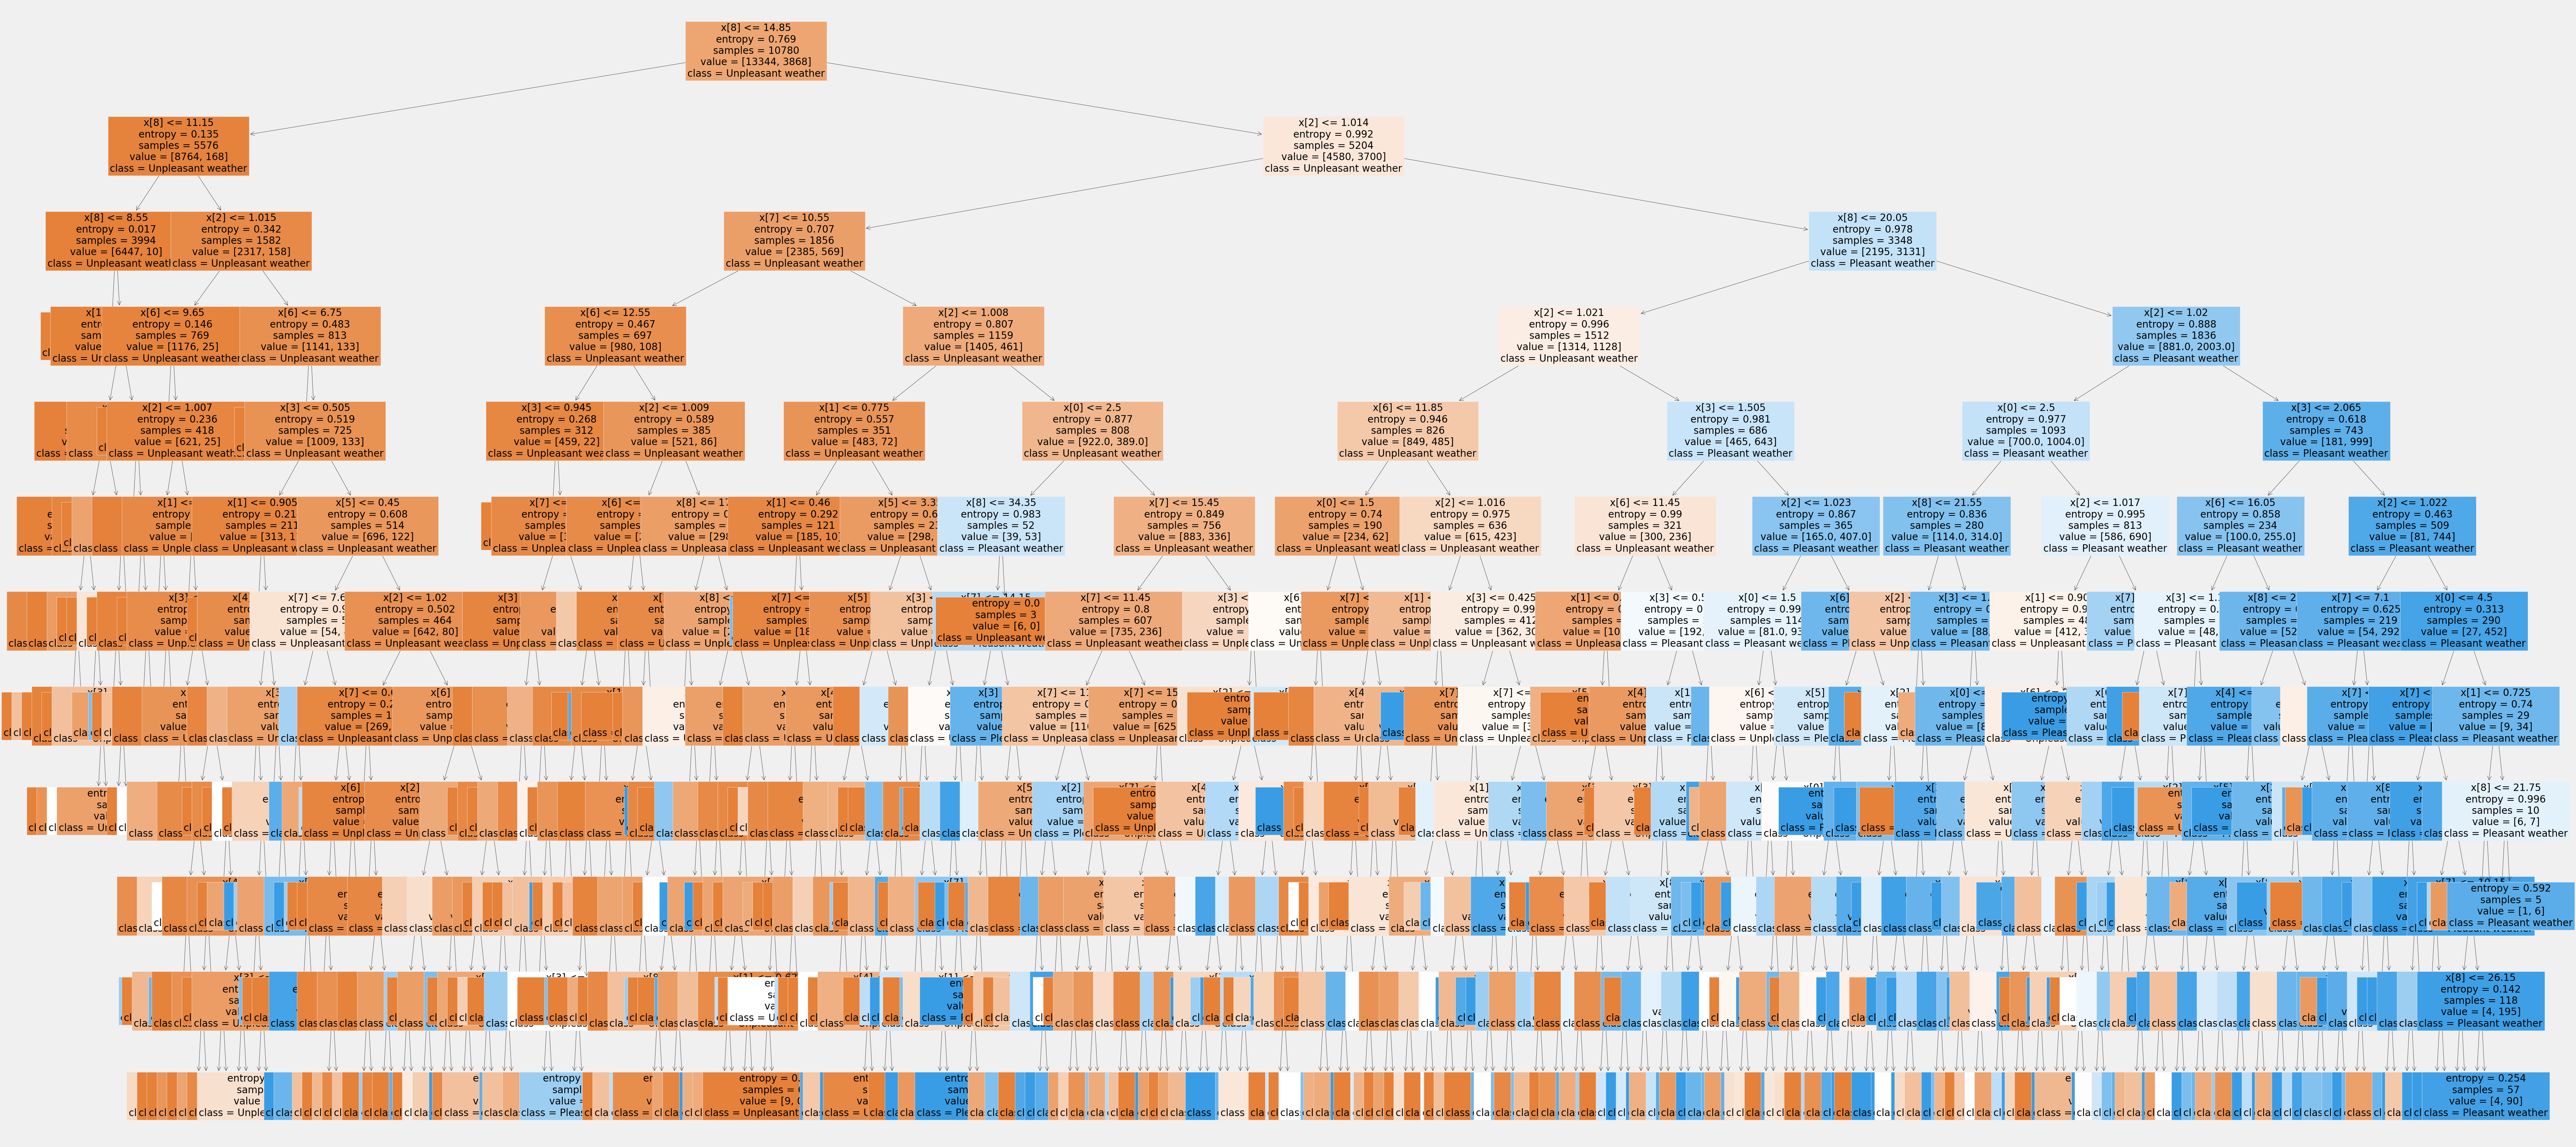

In [91]:
types = {0:'Unpleasant weather', 1:'Pleasant weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=types, filled=True);

In [93]:
fig.savefig(os.path.join(path,'optimized_random_forest_90s_maastricht.png'), bbox_inches='tight')

#### 05 Calculate Feature Importances

In [95]:
#determine feature importances

np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.01623632, 0.03481384, 0.18730567, 0.06446494, 0.02230396,
       0.04398814, 0.04488223, 0.04771842, 0.53828647])

In [97]:
# create list of weather features
features = ['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [99]:
important = pd.Series(newarray, index = features) #.sort_values(ascending = False)
important

cloud_cover         0.016236
humidity            0.034814
pressure            0.187306
global_radiation    0.064465
precipitation       0.022304
sunshine            0.043988
temp_mean           0.044882
temp_min            0.047718
temp_max            0.538286
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


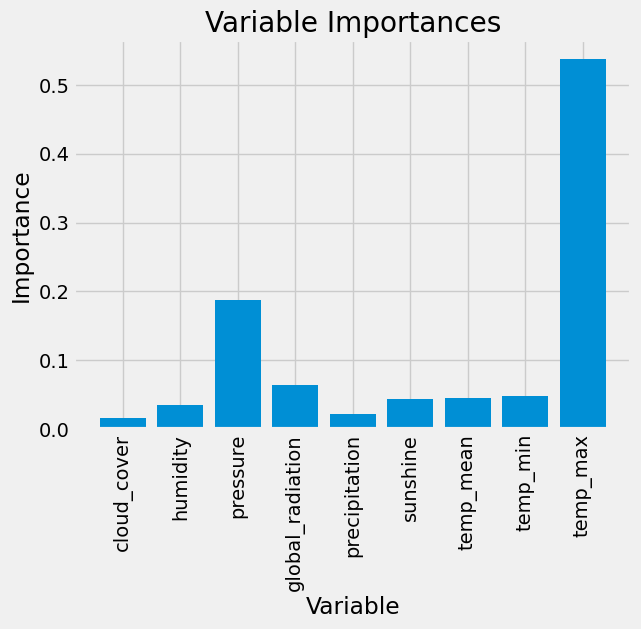

In [101]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(features)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, features, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');